### Постановка задачи.

Получить модель булевой функции (БФ) на основе однослойной НС (единичный нейрон) с двоичными входами 𝑥1,𝑥2,𝑥3,𝑥4∈{0,1}, единичным входом смещения 𝑥0=1, синаптическими весами 𝑤0,𝑤1,𝑤2,𝑤3,𝑤4, двоичным выходом 𝑦∈{0,1} и заданной нелинейной функцией активации (ФА) 𝑓:𝑅→(0,1) (рис. 1.1).

Для заданной БФ (варианты см. в табл. 1.4) реализовать обучение НС с использованием:
1. всех комбинаций переменных 𝑥1,𝑥2,𝑥3,𝑥4;
2. части возможных комбинаций переменных 𝑥1,𝑥2,𝑥3,𝑥4;

остальные комбинации являются тестовыми.

In [1]:
from variants import *
from services import NeuralNetwork
import pandas as pd
from copy import copy
import matplotlib.pyplot as plt

input_data = FULL_TRAIN_DATA
expected_output_data = set_expected_output_data()

/Users/eblackbu/PycharmProjects/ITIBFirst/venv/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


<b> Таблица истинности </b>

In [2]:
truth_table = [[*x[0]] + [x[1]] for x in zip(input_data, expected_output_data)]
pd.DataFrame(truth_table, columns=('x1', 'x2', 'x3', 'x4', 'F'))

,x1,x2,x3,x4,F
0,0,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,1,1,1
4,0,1,0,0,0
5,0,1,0,1,1
6,0,1,1,0,0
7,0,1,1,1,1
8,1,0,0,0,0
9,1,0,0,1,1


***

<b> Функция активации 1</b>

$$ f(net)= \left\{
\begin{array}{ll}
      1 & net >= 0 \\
      0 & net < 0 \\
\end{array}
\right.  $$

In [3]:
data = []
epoch_number = 0
count_errors = 1
errors = []
epochs = []
nn = NeuralNetwork(learning_rate=0.1, activation_function=first_af, derivative_function=first_df)

while count_errors:
    epoch_number += 1
    current_weights = copy(nn.weights)
    count_errors = nn.epoch(input_data, expected_output_data)

    data.append([epoch_number,
                 f'({current_weights[1]:.3}, {current_weights[2]:.3}, {current_weights[3]:.3}, {current_weights[4]:.3}, {current_weights[0]:.3})',
                 f'({", ".join(map(str, nn.current_nn_output))})',
                 nn.current_error_count])
    epochs.append(epoch_number)
    errors.append(count_errors)

pd.DataFrame(data, columns=('Номер эпохи k', 'Вектор весов w', 'Выходной вектор y', 'Суммарная ошибка E'))

,Номер эпохи k,Вектор весов w,Выходной вектор y,Суммарная ошибка E
0,1,"(1.0, 1.0, 1.0, 1.0, 1.0)","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)",9
1,2,"(0.6, 0.6, 0.6, 0.9, 0.1)","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)",9
2,3,"(0.2, 0.2, 0.2, 0.8, -0.8)","(0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1)",1
3,4,"(0.2, 0.2, 0.2, 0.7, -0.9)","(0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1)",0


<b> График ошибки </b>

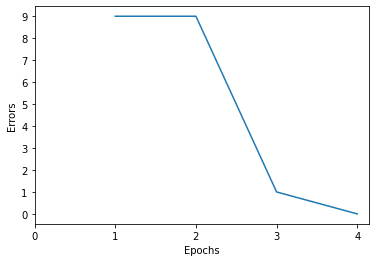

In [4]:
plt.plot(epochs, errors)
plt.xlabel('Epochs')
plt.ylabel('Errors')
plt.xticks([x for x in range(len(epochs) + 1)], [x for x in range(len(epochs) + 1)])
plt.yticks([x for x in range(max(errors) + 1)], [x for x in range(max(errors) + 1)])
plt.show()

***

<b> Функция активации 3</b>

$$f(net) = \dfrac{1}{1 + exp(-net)}$$

In [5]:
data = []
epoch_number = 0
count_errors = 1
errors = []
epochs = []
nn = NeuralNetwork(learning_rate=0.45, activation_function=third_af, derivative_function=third_df)

while count_errors:
    epoch_number += 1
    current_weights = copy(nn.weights)
    count_errors = nn.epoch(input_data, expected_output_data)

    data.append([epoch_number,
                 f'({current_weights[1]:.3}, {current_weights[2]:.3}, {current_weights[3]:.3}, {current_weights[4]:.3}, {current_weights[0]:.3})',
                 f'({", ".join(map(str, nn.current_nn_output))})',
                 nn.current_error_count])
    epochs.append(epoch_number)
    errors.append(count_errors)

pd.DataFrame(data, columns=('Номер эпохи k', 'Вектор весов w', 'Выходной вектор y', 'Суммарная ошибка E'))


,Номер эпохи k,Вектор весов w,Выходной вектор y,Суммарная ошибка E
0,1,"(1.0, 1.0, 1.0, 1.0, 1.0)","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)",9
1,2,"(0.954, 0.952, 0.951, 0.944, 0.818)","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)",9
2,3,"(0.889, 0.884, 0.881, 0.876, 0.59)","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)",9
3,4,"(0.792, 0.778, 0.772, 0.791, 0.292)","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)",9
4,5,"(0.623, 0.586, 0.57, 0.685, -0.132)","(0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)",8
5,6,"(0.295, 0.212, 0.173, 0.577, -0.701)","(0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1)",0


<b> График ошибки </b>

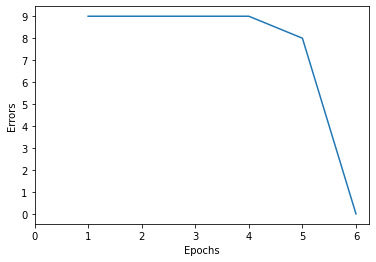

In [6]:
plt.plot(epochs, errors)
plt.xlabel('Epochs')
plt.ylabel('Errors')
plt.xticks([x for x in range(len(epochs) + 1)], [x for x in range(len(epochs) + 1)])
plt.yticks([x for x in range(max(errors) + 1)], [x for x in range(max(errors) + 1)])
plt.show()